In [2]:
#import libraries
import numpy as np
import pandas as pd


PART 1

In [3]:
data = pd.read_excel("colon.csv.xlsx")
data

,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240.1,T95018,H86060.1,T63484,R02593.1,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control,control.1,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474.1,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,3.62,3.31,2.986154,2.71,2.091310,3.12,2.745517,2.42,3.352726,2.97,1.903140,1.97,2.730563,2.69,2.035089,3.15,2.042083,2.10,2.204231,2.31,2.721739,2.85,2.825560,2.85,2.386778,2.42,1.398847,1.76,2.447027,1.53,1.687756,2.560,2.747216,2.530,1.899852,2.42,1.445855,2.280,2.428956,2.43,...,-0.414,-1.217036,-0.769,-1.418581,-1.150,1.979239,-0.944,-0.931172,-1.430,0.262539,-0.233,-1.946624,0.8760,-1.037066,-1.1000,-1.677406,-1.940,-1.092940,-0.450,-0.561533,-1.060,-0.721758,-1.980,-1.427320,-1.880,-1.131629,0.235,-1.831907,0.034,-0.705028,-1.030,-0.983356,-0.531,-1.142698,-1.1100,-0.520386,-0.315,-1.764190,-2.75,1
1,3.47,3.68,3.425553,3.05,2.402400,2.46,2.150405,2.26,3.020793,3.26,2.261542,2.00,2.003506,2.30,2.184510,2.93,1.941990,2.19,1.877344,1.87,2.669624,2.66,2.823047,3.11,1.911331,2.55,1.531832,1.87,1.721723,1.58,2.061451,2.790,3.203130,2.870,1.602802,2.34,2.017719,2.820,2.594015,2.59,...,-0.869,-0.430265,-1.410,-0.833543,-1.160,1.540948,-0.729,-1.744166,-1.260,0.232264,0.090,-2.108055,0.1000,-0.505221,-0.0896,-1.506975,-1.870,-0.738943,0.254,0.109248,-0.547,-0.658216,-1.300,-2.516889,-1.370,-1.183111,0.408,-1.555179,0.811,-0.014318,-1.230,-3.063926,0.156,-0.687025,-0.7770,-1.093455,-1.210,-1.062064,-2.13,1
2,3.02,2.78,2.569772,3.21,2.707560,2.63,2.385288,3.00,2.633958,2.40,2.931019,2.88,2.835286,3.33,2.865767,3.09,2.526776,2.58,2.105645,2.33,2.047186,3.46,2.049156,2.40,2.778580,2.70,2.358419,2.61,1.952626,2.50,2.337628,2.060,1.618570,1.860,2.137378,1.56,2.344320,1.320,2.445149,2.45,...,-0.869,-1.317392,-1.670,-1.784164,-1.020,0.672531,-0.977,-1.211414,-1.290,-0.329366,-1.060,-1.759417,0.0519,-0.511611,-0.8940,-0.927615,-1.260,-1.419705,-0.180,-2.714742,-1.330,-1.642952,-0.705,-1.394897,-1.830,-1.952739,-0.214,-0.759104,-0.343,0.143622,-0.758,0.318488,-1.250,-1.099859,-0.1310,-2.748068,-1.010,-2.260031,-1.50,1
3,3.10,2.86,2.772942,3.19,2.354082,2.76,2.103475,2.93,3.176524,2.84,3.444573,2.53,2.641641,2.99,2.255694,3.23,2.363165,2.86,2.227314,1.90,2.020528,2.82,1.941989,2.24,2.693208,2.30,2.170879,2.66,2.009180,3.07,1.775271,1.530,1.834018,2.410,1.750000,1.49,1.983691,1.950,2.550941,2.55,...,-0.819,-0.878310,-0.809,-2.019259,-0.895,0.841346,-0.785,-1.897242,-1.360,-0.338986,-1.500,-1.140871,0.1740,-1.201035,-0.7400,-0.765201,-0.996,-2.321033,-0.153,-1.200784,-0.931,-3.129875,-1.180,-1.018646,-2.460,-1.362317,-0.926,-2.267568,-0.477,-0.300846,-1.180,0.079492,-1.070,-0.465491,-0.4550,-1.804783,-1.610,-1.223450,-1.07,1
4,3.01,2.91,2.560548,3.25,2.336800,3.04,2.881109,2.55,2.852425,2.57,2.699242,2.48,3.511958,3.09,2.383546,3.11,1.984093,2.49,2.676500,2.84,2.363906,3.12,1.972426,2.57,2.433590,1.95,1.988952,2.32,2.446469,2.41,2.114566,2.260,1.785115,1.900,2.310444,1.40,2.187745,1.190,2.264957,2.26,...,-0.912,-1.262787,-1.310,-2.035389,-0.721,0.262009,-1.360,-0.879217,-0.892,-0.502130,-2.120,-1.761902,-0.4660,-0.867064,-0.8460,-0.609606,-1.440,-1.707813,-0.448,-1.232795,-1.160,-1.953679,-1.930,-0.851617,-0.844,-0.878035,-0.434,-0.758475,-0.669,0.519280,-0.491,-0.081214,-1.160,-0.889998,-0.5280,-1.636024,-1.210,-1.232686,-1.62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,3.46,3.30,3.183344,

In [4]:
data.shape

(62, 2001)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 2001 entries, H55933 to Class
dtypes: float64(2000), int64(1)
memory usage: 969.4 KB


In [6]:
data.describe()

,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240.1,T95018,H86060.1,T63484,R02593.1,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control,control.1,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474.1,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,3.330806,2.989355,2.800924,2.763548,2.472967,2.899194,2.648925,2.476935,2.904830,2.766935,2.568188,2.266774,2.488425,2.523226,2.498856,2.848226,2.433457,2.237903,2.290620,2.436129,2.530406,2.920161,2.610426,2.524839,2.190410,2.812903,1.728837,2.347903,2.231305,2.262742,2.322603,2.016548,2.466430,2.078581,1.713178,2.182903,2.163367,1.862145,2.202987,2.202903,...,-1.076468,-0.526211,-1.229498,-1.458920,-1.238879,0.183862,-1.031161,-0.890922,-1.437798,0.066537,-0.310123,-1.702993,-0.455003,-1.107042,-0.503832,-0.852631,-1.158031,-1.239163,-0.198037,-1.034341,-1.532145,-0.880362,-1.503129,-1.548478,-1.281613,-1.447034,-0.251045,-1.298070,-0.302632,-0.257381,-0.921258,0.127322,-0.686516,-0.639775,-0.452247,-1.242818,-0.811684,-1.537266,-1.713345,-0.290323
std,0.266054,0.413307,0.420324,0.369537,0.388927,0.400771,0.335883,0.387559,0.402561,0.370155,0.456392,0.366189,0.420447,0.411820,0.394780,0.326117,0.321087,0.380729,0.357751,0.355082,0.329331,0.373958,0.356914,0.418838,0.420780,0.405836,0.383186,0.309214,0.426636,0.419942,0.436771,0.379755,0.457175,0.407738,0.496574,0.415962,0.368213,0.439442,0.402419,0.402025,...,0.571413,0.821044,0.488200,0.488449,0.526431,1.196409,0.361462,0.763304,0.513931,0.498547,0.727991,0.425575,1.042744,0.477672,0.786168,0.397623,0.683865,0.565315,0.632737,0.574762,0.589433,0.657056,0.401888,0.578119,0.575283,0.522509,0.709751,0.431777,0.735204,0.453507,0.547862,0.648029,0.489720,0.396222,0.785548,0.658078,0.460455,0.479148,0.676037,0.964741
min,2.690000,1.870000,1.590814,1.940000,1.636844,1.640000,1.837929,1.500000,1.676929,1.740000,1.471060,1.710000,1.564886,1.540000,1.283413,1.630000,1.685030,1.330000,1.326119,1.570000,1.741586,1.590000,1.797953,1.380000,1.201293,1.950000,0.931005,1.610000,0.982843,1.380000,1.385553,0.956000,1.229690,0.202000,0.488911,1.060000,1.398105,0.603000,1.017659,1.020000,...,-3.150000,-2.300087,-3.130000,-2.565671,-2.570000,-2.883728,-1.900000,-2.402783,-3.010000,-1.906301,-2.900000,-2.601405,-2.760000,-2.946828,-2.020000,-1.923235,-2.610000,-2.404744,-3.620000,-2.714742,-3.120000,-3.129875,-2.530000,-3.294005,-2.740000,-2.592793,-2.420000,-2.450852,-3.380000,-2.418978,-2.740000,-3.063926,-1.960000,-1.962065,-3.500000,-2.851668,-2.190000,-2.964662,-3.530000,-1.000000
25%,3.152500,2.780000,2.533408,2.552500,2.272630,2.630000,2.397965,2.187500,2.736454,2.512500,2.277239,2.002500,2.183432,2.275000,2.250531,2.685000,2.227178,2.010000,2.106190,2.202500,2.286797,2.692500,2.411767,2.240000,1.917143,2.470000,1.480259,2.217500,1.953915,1.997500,2.064280,1.755000,2.200629,1.892500,1.483789,1.940000,1.951279,1.610000,1.98

In [7]:
data.corr()

,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240.1,T95018,H86060.1,T63484,R02593.1,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control,control.1,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474.1,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
H55933,1.000000,0.193500,0.182020,0.372220,0.083951,0.298458,0.255915,0.017004,0.669001,0.128918,-0.183989,-0.036402,-0.024281,-0.205334,0.106860,0.052108,-0.039824,-0.167163,0.219874,0.170179,0.716376,0.012884,0.752024,0.070359,0.003299,0.115276,-0.099602,-0.185579,0.238924,-0.102685,0.049899,0.108463,0.260718,0.137605,0.152672,0.697574,-0.072189,0.283124,0.126865,0.127235,...,0.365903,0.408902,0.235196,0.425398,0.035807,-0.105738,0.300687,-0.128494,-0.122464,-0.060631,0.215700,-0.332710,0.086488,-0.051162,0.005957,-0.281579,-0.004808,-0.037872,0.242917,0.090900,-0.044783,0.098090,-0.190818,-0.273372,-0.134764,-0.032221,0.021697,-0.001575,0.292558,-0.319851,0.030142,-0.130996,-0.119761,0.088012,-0.290499,0.401650,0.391191,0.124431,-0.129837,-0.101902
R39465,0.193500,1.000000,0.975333,0.251060,0.022720,0.242423,-0.030349,0.203456,0.304867,0.758335,0.024738,0.145573,-0.075879,-0.224053,-0.057475,0.090614,-0.257343,-0.086999,-0.031212,0.029986,0.007514,-0.209744,0.038630,0.660184,0.183049,-0.070387,0.094757,-0.429086,0.212029,-0.228411,-0.226818,0.519793,0.564588,0.768733,0.408253,0.039278,-0.317716,0.740370,0.047756,0.048483,...,0.139165,-0.237362,0.102355,-0.186785,-0.202170,0.171822,-0.185168,-0.063392,-0.274106,0.254994,0.316666,-0.188473,-0.009603,0.089887,-0.056103,-0.330837,-0.426636,0.340050,-0.204862,0.382677,0.432988,0.263433,-0.180089,-0.257565,-0.223832,-0.315855,0.257666,-0.075875,0.411790,0.090026,-0.043458,-0.328908,0.470317,-0.204074,-0.223176,-0.320720,-0.312359,-0.152733,-0.302426,0.006101
R39465.1,0.182020,0.975333,1.000000,0.194332,0.064010,0.269417,-0.019331,0.251209,0.301857,0.767153,0.033436,0.175626,-0.132747,-0.228108,0.000561,0.073554,-0.199367,-0.079602,-0.008817,0.051775,-0.010356,-0.180188,0.064057,0.680876,0.220218,0.039067,0.128138,-0.366321,0.239793,-0.191786,-0.143271,0.461967,0.611611,0.770318,0.397061,0.037213,-0.248196,0.756938,0.051080,0.051752,...,0.084927,-0.168845,0.007905,-0.151264,-0.309846,0.108571,-0.241693,-0.055359,-0.305156,0.326044,0.377189,-0.181545,-0.054017,0.086026,-0.077399,-0.268349,-0.399835,0.378610,-0.168407,0.344642,0.350991,0.290367,-0.174374,-0.290181,-0.168993,-0.333979,0.278024,-0.067375,0.424648,0.054170,-0.072454,-0.266232,0.447813,-0.208167,-0.227743,-0.352151,-0.333941,-0.199941,-0.257202,-0.079985
R85482,0.372220,0.251060,0.194332,1.000000,-0.000802,-0.088279,-0.072262,0.180612,0.579581,0.109082,0.168979,0.250142,0.237650,-0.089701,0.043694,0.181587,-0.374464,0.135658,0.026375,0.085324,0.185644,-0.031915,0.176377,0.087565,0.231827,-0.193035,0.205382,-0.238692,-0.114719,-0.043534,-0.101931,0.092816,-0.126773,0.153373,0.346417,-0.018796,-0.176415,0.242113,-0.037433,-0.037853,...,0.517783,-0.119813,0.150535,0.095354,0.577837,-0.143814,0.376002,-0.186161,-0.010186,-0.394710,-0.328670,-0.149474,-0.022759,0.316886,-0.052207,-0.310459,-0.192187,-0.456135,-0.158535,-0.091585,0.225630,-0.277867,-0.013924,-0.094107,-0.251914,-0.255965,-0.230058,0.098964,0.110350,0.146721,0.213666,-0.372172,-0.095526,0.157625,-0.060797,0.114510,0.059730,-0.007620,-0.058838,0.048001
U14973,0.083951,0.022720,0.064010,-0.000802,1.000000,0.024946,0.107785,0.652109,0.111912,0.031157,0.618870,0.695818,-0.063205,0.416552,0.791782,-0.288013,0.486262,0.564160,0.055657,0.098444,0.140635,0.667487,0.144320,-0.096011,0.684405,0.546053,0.726579,0.540410,0.072390,0.227839,0.681968,-0.096947,0.096575,-0.013092,0.348459,0.091263,0.712815,0.

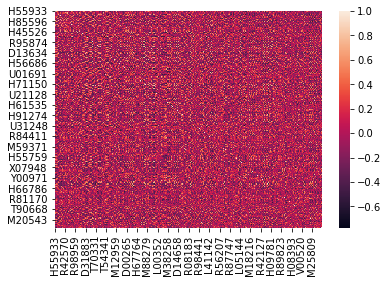

In [8]:
import seaborn as sns
sns.heatmap(data.corr())

In [9]:
#for dimension reduction , using PCA(principal component analysis )
from sklearn.model_selection import train_test_split

In [10]:
x = data.iloc[:, :-1]
x

,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240.1,T95018,H86060.1,T63484,R02593.1,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control,control.1,...,H77510,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474.1,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647
0,3.62,3.31,2.986154,2.71,2.091310,3.12,2.745517,2.42,3.352726,2.97,1.903140,1.97,2.730563,2.69,2.035089,3.15,2.042083,2.10,2.204231,2.31,2.721739,2.85,2.825560,2.85,2.386778,2.42,1.398847,1.76,2.447027,1.53,1.687756,2.560,2.747216,2.530,1.899852,2.42,1.445855,2.280,2.428956,2.43,...,-1.825788,-0.414,-1.217036,-0.769,-1.418581,-1.150,1.979239,-0.944,-0.931172,-1.430,0.262539,-0.233,-1.946624,0.8760,-1.037066,-1.1000,-1.677406,-1.940,-1.092940,-0.450,-0.561533,-1.060,-0.721758,-1.980,-1.427320,-1.880,-1.131629,0.235,-1.831907,0.034,-0.705028,-1.030,-0.983356,-0.531,-1.142698,-1.1100,-0.520386,-0.315,-1.764190,-2.75
1,3.47,3.68,3.425553,3.05,2.402400,2.46,2.150405,2.26,3.020793,3.26,2.261542,2.00,2.003506,2.30,2.184510,2.93,1.941990,2.19,1.877344,1.87,2.669624,2.66,2.823047,3.11,1.911331,2.55,1.531832,1.87,1.721723,1.58,2.061451,2.790,3.203130,2.870,1.602802,2.34,2.017719,2.820,2.594015,2.59,...,-1.723186,-0.869,-0.430265,-1.410,-0.833543,-1.160,1.540948,-0.729,-1.744166,-1.260,0.232264,0.090,-2.108055,0.1000,-0.505221,-0.0896,-1.506975,-1.870,-0.738943,0.254,0.109248,-0.547,-0.658216,-1.300,-2.516889,-1.370,-1.183111,0.408,-1.555179,0.811,-0.014318,-1.230,-3.063926,0.156,-0.687025,-0.7770,-1.093455,-1.210,-1.062064,-2.13
2,3.02,2.78,2.569772,3.21,2.707560,2.63,2.385288,3.00,2.633958,2.40,2.931019,2.88,2.835286,3.33,2.865767,3.09,2.526776,2.58,2.105645,2.33,2.047186,3.46,2.049156,2.40,2.778580,2.70,2.358419,2.61,1.952626,2.50,2.337628,2.060,1.618570,1.860,2.137378,1.56,2.344320,1.320,2.445149,2.45,...,-0.888543,-0.869,-1.317392,-1.670,-1.784164,-1.020,0.672531,-0.977,-1.211414,-1.290,-0.329366,-1.060,-1.759417,0.0519,-0.511611,-0.8940,-0.927615,-1.260,-1.419705,-0.180,-2.714742,-1.330,-1.642952,-0.705,-1.394897,-1.830,-1.952739,-0.214,-0.759104,-0.343,0.143622,-0.758,0.318488,-1.250,-1.099859,-0.1310,-2.748068,-1.010,-2.260031,-1.50
3,3.10,2.86,2.772942,3.19,2.354082,2.76,2.103475,2.93,3.176524,2.84,3.444573,2.53,2.641641,2.99,2.255694,3.23,2.363165,2.86,2.227314,1.90,2.020528,2.82,1.941989,2.24,2.693208,2.30,2.170879,2.66,2.009180,3.07,1.775271,1.530,1.834018,2.410,1.750000,1.49,1.983691,1.950,2.550941,2.55,...,-1.074376,-0.819,-0.878310,-0.809,-2.019259,-0.895,0.841346,-0.785,-1.897242,-1.360,-0.338986,-1.500,-1.140871,0.1740,-1.201035,-0.7400,-0.765201,-0.996,-2.321033,-0.153,-1.200784,-0.931,-3.129875,-1.180,-1.018646,-2.460,-1.362317,-0.926,-2.267568,-0.477,-0.300846,-1.180,0.079492,-1.070,-0.465491,-0.4550,-1.804783,-1.610,-1.223450,-1.07
4,3.01,2.91,2.560548,3.25,2.336800,3.04,2.881109,2.55,2.852425,2.57,2.699242,2.48,3.511958,3.09,2.383546,3.11,1.984093,2.49,2.676500,2.84,2.363906,3.12,1.972426,2.57,2.433590,1.95,1.988952,2.32,2.446469,2.41,2.114566,2.260,1.785115,1.900,2.310444,1.40,2.187745,1.190,2.264957,2.26,...,-1.371877,-0.912,-1.262787,-1.310,-2.035389,-0.721,0.262009,-1.360,-0.879217,-0.892,-0.502130,-2.120,-1.761902,-0.4660,-0.867064,-0.8460,-0.609606,-1.440,-1.707813,-0.448,-1.232795,-1.160,-1.953679,-1.930,-0.851617,-0.844,-0.878035,-0.434,-0.758475,-0.669,0.519280,-0.491,-0.081214,-1.160,-0.889998,-0.5280,-1.636024,-1.210,-1.232686,-1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [11]:
y = data['Class']
y

0     1
1     1
2     1
3     1
4     1
     ..
57   -1
58   -1
59   -1
60   -1
61   -1
Name: Class, Length: 62, dtype: int64

In [12]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [13]:
#Scalig feature
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x= sc.fit_transform(x)



In [14]:
#Applying pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(x)



In [15]:
#question 1 completed

In [16]:
x

array([[ 24.16876073,  12.87868784],
       [ 38.46895969, -13.0577466 ],
       [-17.17333615, -18.2618499 ],
       [ -5.71542119, -11.60772885],
       [ -9.26249905,   4.05971255],
       [ 15.33647617,   4.20327669],
       [  5.00204265, -13.43969796],
       [ 10.00834721, -27.51279435],
       [-14.2245788 ,  -3.4591497 ],
       [-29.46976309,  -2.01194169],
       [ 21.69352632,  13.21950685],
       [-10.15939975,  -7.64617091],
       [  4.18153812, -19.44095871],
       [ -7.75201364,  -2.63248378],
       [ -7.55499257,  12.83885347],
       [  6.61868813,  12.03673514],
       [  0.44842578,  -6.27039026],
       [  0.12179036,   1.50487394],
       [  8.47759418, -25.55368048],
       [ -2.06460834,  12.98777647],
       [ 19.40693454,  23.88052456],
       [ -5.23565811,   0.64081157],
       [-27.57664006, -20.06422219],
       [ 38.01278722,  -5.62769805],
       [ -5.49228814, -13.37916161],
       [ 12.82470894,  19.49262109],
       [ 11.8152459 ,  19.16308296],
 

In [17]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.65, random_state=40)

part 2

In [18]:
# part 2 Generate label and unlabel data 
x = pd.DataFrame(x)
df = []
ls=[]
for i in range(41):
    sample_num = np.random.randint(low = 0,high = 62)
    df.append(x.iloc[sample_num,:])
    ls.append(i)

In [19]:
df

[0     8.477594
 1   -25.553680
 Name: 18, dtype: float64, 0    11.815246
 1    19.163083
 Name: 26, dtype: float64, 0   -33.959608
 1    33.892883
 Name: 61, dtype: float64, 0     8.477594
 1   -25.553680
 Name: 18, dtype: float64, 0     6.671511
 1   -15.863432
 Name: 52, dtype: float64, 0   -27.576640
 1   -20.064222
 Name: 22, dtype: float64, 0   -27.576640
 1   -20.064222
 Name: 22, dtype: float64, 0    38.012787
 1    -5.627698
 Name: 23, dtype: float64, 0    20.217210
 1     1.176539
 Name: 47, dtype: float64, 0    -5.715421
 1   -11.607729
 Name: 3, dtype: float64, 0    -7.554993
 1    12.838853
 Name: 14, dtype: float64, 0   -27.339929
 1    14.754348
 Name: 32, dtype: float64, 0    6.571256
 1    6.237798
 Name: 34, dtype: float64, 0   -28.142251
 1    -7.801778
 Name: 37, dtype: float64, 0    10.602982
 1    14.040433
 Name: 44, dtype: float64, 0   -33.959608
 1    33.892883
 Name: 61, dtype: float64, 0   -28.761447
 1    -6.375226
 Name: 35, dtype: float64, 0   -4.236101
 1

In [20]:

ls

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [21]:
unlabeled_data = pd.DataFrame(df)
unlabeled_data

,0,1
18,8.477594,-25.553680
26,11.815246,19.163083
61,-33.959608,33.892883
18,8.477594,-25.553680
52,6.671511,-15.863432
22,-27.576640,-20.064222
22,-27.576640,-20.064222
23,38.012787,-5.627698
47,20.217210,1.176539
3,-5.715421,-11.607729


In [22]:
test_data = []
y_data =[]
for i in range(62):
    if i not in ls:
        test_data.append(x.iloc[i,:])
        y_data.append(y.iloc[i])

In [23]:
test_data

[0    10.558864
 1     7.872514
 Name: 41, dtype: float64, 0     1.162555
 1   -22.289796
 Name: 42, dtype: float64, 0   -30.608374
 1    19.799669
 Name: 43, dtype: float64, 0    10.602982
 1    14.040433
 Name: 44, dtype: float64, 0   -29.685024
 1     8.827002
 Name: 45, dtype: float64, 0   -22.773343
 1    -2.811586
 Name: 46, dtype: float64, 0    20.217210
 1     1.176539
 Name: 47, dtype: float64, 0     9.402204
 1    25.597189
 Name: 48, dtype: float64, 0   -13.253600
 1    -5.976057
 Name: 49, dtype: float64, 0     4.104677
 1   -22.001813
 Name: 50, dtype: float64, 0   -18.048191
 1   -14.211802
 Name: 51, dtype: float64, 0     6.671511
 1   -15.863432
 Name: 52, dtype: float64, 0    -5.901880
 1   -21.433822
 Name: 53, dtype: float64, 0   -12.633028
 1   -10.059538
 Name: 54, dtype: float64, 0   -13.375105
 1    -2.786499
 Name: 55, dtype: float64, 0    18.156706
 1   -22.004437
 Name: 56, dtype: float64, 0    22.068794
 1     0.562739
 Name: 57, dtype: float64, 0   -4.236101

In [24]:
y_data

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [25]:
labeled_x = pd.DataFrame(test_data)
labeled_x.index = [i for i in range(21)]
labeled_x

,0,1
0,10.558864,7.872514
1,1.162555,-22.289796
2,-30.608374,19.799669
3,10.602982,14.040433
4,-29.685024,8.827002
5,-22.773343,-2.811586
6,20.217210,1.176539
7,9.402204,25.597189
8,-13.253600,-5.976057
9,4.104677,-22.001813


In [26]:
labeled_y = pd.DataFrame(y_data)
labeled_y.index = [i for i in range(21)]
labeled_y

,0
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [27]:
label = pd.concat([labeled_x, labeled_y], axis=1)
label

,0,1,0
0,10.558864,7.872514,-1
1,1.162555,-22.289796,-1
2,-30.608374,19.799669,-1
3,10.602982,14.040433,-1
4,-29.685024,8.827002,-1
5,-22.773343,-2.811586,-1
6,20.217210,1.176539,-1
7,9.402204,25.597189,-1
8,-13.253600,-5.976057,-1
9,4.104677,-22.001813,-1


part 3

In [28]:
from sklearn import svm 

In [29]:
sm = svm.SVC()
sm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

part 4

In [30]:
#question 4
from sklearn.semi_supervised import LabelSpreading

In [31]:
rng = np.random.RandomState(2)


In [32]:
y_30 = np.copy(y)
y_30[rng.rand(len(y))<0.3]=-1
print(y_30)

[ 1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [33]:
y_50 = np.copy(y)
y_50[rng.rand(len(y))<0.5] = -1
print(y_50)

[ 1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [34]:
y_68 = np.copy(y)
y_68[rng.rand(len(y))<0.68] = -1
print(y_68)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [35]:
ls30 = (LabelSpreading().fit(x,y_30),y_30)
ls50 = (LabelSpreading().fit(x,y_50), y_50)
ls68 = (LabelSpreading().fit(x,y_68), y_68)

/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


part **5**

In [36]:
rbt_svc = (svm.SVC(kernel='rbf', gamma= 5).fit(x,y),y)
rbt_svc

(SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
     probability=False, random_state=None, shrinking=True, tol=0.001,
     verbose=False), 0     1
 1     1
 2     1
 3     1
 4     1
      ..
 57   -1
 58   -1
 59   -1
 60   -1
 61   -1
 Name: Class, Length: 62, dtype: int64)

In [37]:
h=0.02
x_min, x_max = x.iloc[:,0].min()+1, x.iloc[:,0].max()+1
y_min, y_max = x.iloc[:,1].min()+1, x.iloc[:,1].max()+1


In [38]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [39]:
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 68% data', 
          'SVC with rbf kernel']

In [40]:
color_map = {-1:(1,1,1), 0:(0,0,9), 1:(1,0,0), 2:(8,6,0)}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


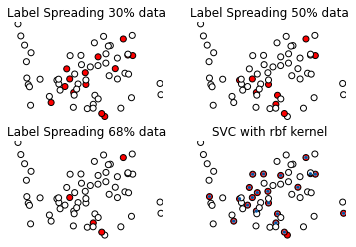

In [45]:
import matplotlib.pyplot as plt
import sys
for i,(clf, y_train) in enumerate((ls30, ls50, ls68, rbt_svc)):
  plt.subplot(2,2, i+1)
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

  Z = Z.reshape(xx.shape)
  plt.contour(xx,yy, Z, cmap='Blues')
  plt.axis('off')

  colors = [color_map[y] for y in y_train]
  plt.scatter(x.iloc[:,0], x.iloc[:,1], c=colors, edgecolors='black')
  plt.title(titles[i])
